**Pokemon** is a global icon to children and adults everywhere. It is a TV series that has expanded into video games, card games, movies, merchandise and everything inbetween. The motivation behind this analysis is to further understand the dynamics of the pokemon universe through data. Part of this notebook is being built off the process used in  [Rachel Tatman's kernal]( https://www.kaggle.com/rtatman/which-pokemon-win-the-most/notebook). She has done some fanstatic work and does an excellent job explaing her thought process. I am interested in improving my python skills, so I will replicate her work from R to python and develop further analysis. I will be looking at missing values and getting some simple calcualtions in. I will then visualize some results using Matplotlib and Seaborn. I will conclude the venture with some machine learning and PCA to try and predict the win percentage of the pokemon. 

The structure is as follows: 
## Table of Contents
> 1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * 1.1. [Missing-Values](#Missing-Values)
    * 1.2 [Visualizing the Data](#Visualizing-the-Data)
        * 1.2.1 [Seaborn Pairplot](#Seaborn-Pairplot)
        * 1.2.2 [Correlation Table](#Correlation-Table)
    * 1.3 [Exploratory Data Analysis Conclusion](#Exploratory-Data-Analysis-Conclusion)
> 2. [Machine Learning](#Machine-Learning)
    * 2.1 [Select Data](#Select-Data)
    * 2.2 [Preprocessing Data](#Preprocessing-Data)
    * 2.3 [Feature Scaling](#Feature-Scaling)  
    * 2.4 [Regression Models](#Regression-Models)  
        * 2.4.1 [Multiple Linear Regression](#Multiple-Linear-Regression)
        * 2.4.2 [Polynomial Regression](#Polynomial-Regression)
        * 2.4.3 [SVM](#SVM)
        * 2.4.4 [Regression Tree](#Regression-Tree)
        * 2.4.5 [Rangom Forest](#Random-Forest)
        * 2.4.6 [XGBoost](#XGBoost)
    * 2.5 [Principle Component Analysis](#Principle-Component-Analysis)
    * 2.6 [Validation](#Validation)
> 3. [Conclusion](#Conclusion)

Data analysis is a powerful tool. However, simply creating visualizations and preditions is not enough to drive decisions in the business world. I will do my best to explain each figure and calculation and how it could be useful to a business in the Pokemon Universe. This is what I am thinking. Let's say there is a company called "**Team Rocket**" who makes millions of dollars off of pokemon battles (I do not condone animal violence in any way, shape or form and no Pokemon were injured during this analysis). As a data consultant, **Team Rocket** gives you this data set and ask you to come up with some useful insight on how to improve their business. This can be difficult because there in not much direction given for the analysis. 

Let's break down the task. 
>  1. Understand the business: Team Rocket funds their illegal activities through winning pokemon battles and tournaments. Thus, we will want our analysis to be directed towards finding the best pokemon. 
>  2. Start shallow and dive deeper: As we explore the data, I think its best practice to start the investigation at a higher lever then work our way down and traverse the data. 
>  3. Drive Business Decisions: Once out analysis is complete, relate it back to the business and make suggestions for areas Team Rocket could improve in.


# Exploratory Data Analysis

We begin by importing the proper libraries, files and taking a look at what we're dealing with, 

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt # data visualization
#import matplotlib.pyplot as plt
import seaborn as sns #data visualization
import random 

random.seed(1)
# Import the dataset
pokemon = pd.read_csv("../data/pokemon/pokemon.csv")
# rename the column with a pound sign/hashtag as "number" its name
# The reason for this is when  we try and access this column later it will comment out the code
pokemon = pokemon.rename(index=str, columns={"#": "Number"})
combat = pd.read_csv("../data/pokemon/combats.csv")
pokemon.head()

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combat: " + str(combat.shape))

Dimenstions of Pokemon: (800, 12)
Dimenstions of Combat: (50000, 3)


## Missing Values

In [6]:
pokemon.isnull().sum()

Number          0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

Some quick notes on my initial thought and comments about the data. 
>    1. Generation is which season of the show the pokemon come out. Think of it as a similar concept to "baby boomers" and "millennials"
>    2. Type 2 there is are NA values. Some Pokemon have secondary classification. For example, one pokemon might be able to breath fire and fly. So its Type 1 would be 'fire' but it would also can fly so its Type 2 would be 'flying'.  Some poemon don't have a secondary type, thus the NA value. There are 386 pokemon without a Type 2. 
>    3. There is one name that is missing. We will want to explore that instance, maybe we can fix it.
>    4. There are 800 different pokemon in the dataset and 50k battles recorded

**Let's begin by finding the missing pokemon!**

In [8]:
print("This pokemon is before the missing Pokemon: " + pokemon['Name'][61])
print(pokemon[pokemon['Name'].isnull()])
print("This pokemon is after the missing Pokemon: " + pokemon['Name'][63])

This pokemon is before the missing Pokemon: Mankey
    Number Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
62      63  NaN  Fighting    NaN  65     105       60       60       70   

    Speed  Generation Legendary  
62     95           1     False  
This pokemon is after the missing Pokemon: Growlithe


Assuming that the indexes follow the same numbering system as the National Pokedex Number, we can look up the missing Pokemon that falls between the two by looking him up. I used this [link](https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_National_Pok%C3%A9dex_number). **Primeape** is the missing Pokemon. Update his name in the database.


In [9]:
pokemon['Name'][62] = "Primeape"

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


From the combats dataset we will calculate the win percentage of each pokemon. Hopefully, this can help us lean more about which pokemon win. Then we can dive deeper to try and determine which stats contribute most to winning or which type of pokemon win the most. We can continually increase the granularity of our analysis to derive better understanding. We then look at the shape of the data frames and find a very interesting anomaly.

In [10]:
# calculate the win % of each pokemon 
# add the calculation to the pokemon dataset 
total_Wins = combat.Winner.value_counts()
# get the number of wins for each pokemon
numberOfWins = combat.groupby('Winner').count()

#both methods produce the same results
countByFirst = combat.groupby('Second_pokemon').count()
countBySecond = combat.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


We can see that the number of dimensions is different in the total wins. This can only mean there is one pokemon that was unable to win during it's fights. Lets find the pokemon that did not win a single fight.

In [11]:
find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1 #offset because the index and number are off by one
losing_pokemon = pokemon.iloc[find_losing_pokemon[0],]
print(losing_pokemon)

Number            231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


Poor **Shuckle**  :( It appears that he has very strong defense but is very weak in all other catergories. I suppose the saying "the best offense is a good defense" doesnt apply in the Pokemon universe. 

Add Shuckle to the data so that the array lengths are the same. This will make merging the two datasets easier. In addition, Schuckle was a pokemon that lost all of his battles. Could there be pokemon that didnt battle at all? What I do now is caculate the win percentage of each pokemon and add that feature to the data frame. I think this might be useful down the road. Lets say a new pokemon is discovered, based on its stats can we predict how much it will win? But before we do that, let's do some more exploratory data analysis! 

The process of creating the "Win Percentage" column is known as **feature engineering**. It is the process of using given data and combining it in come combination to create new variable (or features) to be used in the analysis and is an important part of machine learning. Below, we develope the new feature, add it to our data set then we merge the two datasets. From there, we notice that there are some pokemon that dont have any recoreded battles. 


In [12]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

# merge the winning dataset and the original pokemon dataset
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='Number')
results3 = pd.merge(pokemon, numberOfWins, left_on='Number', right_index = True, how='left')

# We can look at the difference between the two datasets to see which pokemon never recorded a fight
#missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)
#subset the dataframe where pokemon win percent is NaN
results3[results3['Win Percentage'].isnull()]


,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False,NaN,NaN,NaN,NaN
32,33,Sandshrew,Ground,NaN,50,75,85,20,30,40,1,False,NaN,NaN,NaN,NaN
45,46,Wigglytuff,Normal,Fairy,140,70,45,85,50,45,1,False,NaN,NaN,NaN,NaN
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,1,False,NaN,NaN,NaN,NaN
77,78,Victreebel,Grass,Poison,80,105,65,100,70,70,1,False,NaN,NaN,NaN,NaN
89,90,Magneton,Electric,Steel,50,60,95,120,70,70,1,False,NaN,NaN,NaN,NaN
143,144,Ditto,Normal,NaN,48,48,48,48,48,48,1,False,NaN,NaN,NaN,NaN
182,183,Ariados,Bug,Poison,70,90,70,60,60,40,2,False,NaN,NaN,NaN,NaN
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,NaN,NaN,NaN,NaN
235,236,Ursaring,Normal,NaN,90,130,75,75,75,55,2,False,NaN,NaN,NaN,NaN


Looks like our inital hunch was correct! There were some Pokemon that did not battle. Later on we will use some machine learning techniques to predict their liklihood of winning. 

## Find the top 10 Pokemon with the worse win percentage

In [13]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
289,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False,3.0,3.0,138.0,0.021739
189,190,Togepi,Fairy,NaN,35,20,65,40,65,20,2,False,3.0,3.0,122.0,0.024590
638,639,Solosis,Psychic,NaN,45,30,40,105,50,20,5,False,4.0,4.0,129.0,0.031008
236,237,Slugma,Fire,NaN,40,40,40,70,40,20,2,False,4.0,4.0,123.0,0.032520
576,577,Munna,Psychic,NaN,76,25,45,67,55,24,5,False,5.0,5.0,128.0,0.039062
188,189,Igglybuff,Normal,Fairy,90,30,15,40,20,15,2,False,5.0,5.0,115.0,0.043478
394,395,Wynaut,Psychic,NaN,95,23,48,23,48,23,3,False,6.0,6.0,130.0,0.046154
209,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,6.0,6.0,125.0,0.048000
291,292,Cascoon,Bug,NaN,50,35,55,25,25,15,3,False,7.0,7.0,133.0,0.052632
752,753,Spritzee,Fairy,NaN,78,52,60,63,65,23,6,False,8.0,8.0,133.0,0.060150


## Find the top 10 Pokemon with the best win percentage

In [14]:
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False ).head(10)

,Number,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
154,155,Mega Aerodactyl,Rock,Flying,80,135,85,70,95,150,1,False,127.0,127.0,129.0,0.984496
512,513,Weavile,Dark,Ice,70,120,65,45,85,125,4,False,116.0,116.0,119.0,0.974790
703,704,Tornadus Therian Forme,Flying,NaN,79,100,80,110,90,121,5,True,121.0,121.0,125.0,0.968000
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,1,False,115.0,115.0,119.0,0.966387
153,154,Aerodactyl,Rock,Flying,80,105,65,60,75,130,1,False,136.0,136.0,141.0,0.964539
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,4,False,124.0,124.0,129.0,0.961240
726,727,Greninja,Water,Dark,72,95,67,103,71,122,6,False,122.0,122.0,127.0,0.960630
716,717,Meloetta Pirouette Forme,Normal,Fighting,100,128,90,77,77,128,5,False,118.0,118.0,123.0,0.959350
164,165,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,1,True,119.0,119.0,125.0,0.952000
349,350,Mega Sharpedo,Water,Dark,70,140,70,110,65,105,3,False,114.0,114.0,120.0,0.950000


There is a clear difference between Poekmon that win and lose. The most obvious reason to me are the vast differences in their stats. From a quick glance it appears that attack and speed are significantly higher in Pokemon that win. I also would like to point out two other oberservations. There are several winning pokemon with the Prefix "**Mega**". I am not sure the difference between **Mega Aerodactyl** and regular  **Aerodactyl** but I'm confident that plays a role. Perhaps asking my 7 year old cousin about the difference could help.

Which actually brings up a good point. As you drive into the data, there might be anolomlies that dont make sense but you have a "gut" feeling that there might be a correlation to the outcome. This is why understanding the buisness and where the data is coming from is so very crutial to helping the business out. In this case of "Mega" vs "non-Mega", maybe finding "Mega" pokemon in the wild is much more difficult and cost a lot more resources (ie: Time, pokeball quality, more potions and stronger pokemon to catch it). For these reasons, even though the Mega Aerodactyl wins more often the business cost might outweight the potential business revenue. 

## Basic statistics of the data 

In [15]:
results3.describe()

,Number,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,63.856960,63.856960,127.541507,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,32.925941,32.925941,11.397402,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,3.000000,3.000000,92.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,36.000000,36.000000,120.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,62.000000,62.000000,128.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,91.000000,91.000000,135.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,152.000000,152.000000,164.000000,0.984496


The above table displays the basic statistics of each variable like the mean, min, max, ect. The reason I find this helpful is it gives a better understanding of the range of values we are working with and the average of these values. If we make some predictions and the data is well outside the range we are working with, then we can make a reasonable assumption that our model is not working correctly. In addition, some machine learning models we might want to standardize or normalize the data.

## Visualizing the Data

As I stated in the begining, I think data analyst often get too excited (not that there is anything wrong with that) about the project and they begin their exploration with too much detail. I belive we shoud, start very basic and take one step at a time. 

In [18]:
import matplotlib.pyplot as plt
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results3)
#f.set_xticklabels(rotation=30)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

In [19]:
ax = sns.countplot(x="Type 2", hue="Legendary", data=results3)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

We can see that water, normal, bug and grass are the most common type 1 and flying, ground and poison are the most common type 2. Even though it doesnt tell me the exact population (ie. there are 1 million grass type 1 pokemon in the world), what it doesnt tell me is which attributes are most apparent. How this can be usefull is possibly predicting the liklihood of battling a particular type of pokemon and having a counter type to it. For example, a water type pokemon. Since we know water pokemon are weak agaisnt grass or electric, it might be a good idea to keep one of those types in our battle squad. 

Lets aggregate our win percentage by type 1.

In [20]:
results3.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
Type 1,
Fairy,0.329300
Rock,0.404852
Steel,0.424529
Poison,0.433262
Bug,0.439006
Ice,0.439604
Grass,0.440364
Water,0.469357
Fighting,0.475616


In [36]:
types = pd.crosstab(results3['Type 1'], results3['Type 2'] )

In [41]:
types = types + types.T

In [42]:
types

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,0,13,0,5,7,1
Dark,0,0,3,0,0,3,3,5,3,3,3,2,0,3,3,2,2,6
Dragon,0,3,0,2,1,0,2,8,2,1,7,3,0,1,4,2,1,2
Electric,2,0,2,0,1,0,1,5,1,1,1,1,2,0,0,0,3,3
Fairy,0,0,1,1,0,0,0,2,0,2,0,0,5,0,6,3,3,2
Fighting,2,3,0,0,0,0,7,1,0,3,0,0,2,2,6,1,3,3
Fire,2,3,2,1,0,7,0,6,3,0,4,0,2,0,3,1,1,1
Flying,14,5,8,5,2,1,6,0,2,5,4,2,24,3,6,4,1,7
Ghost,1,3,2,1,0,0,3,2,0,10,2,1,0,4,1,0,4,2


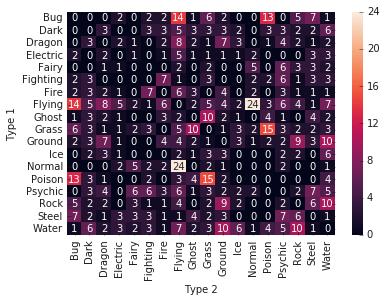

In [44]:
import seaborn as sns
%matplotlib inline

sns.heatmap(types, annot=True)

In [61]:
results3['counter'] = np.repeat(1,800)

In [ ]:
(1, 20)

In [65]:
by_types = results3.pivot_table(values=['Win Percentage','counter'], index=['Type 1' , 'Type 2'], aggfunc=np.sum).sort_values(by = "Win Percentage", ascending=False)

In [66]:
by_types['win ratio'] = by_types['Win Percentage']/by_types['counter']

In [68]:
by_types.sort_values(by = "win ratio", ascending=False)

,,Win Percentage,counter,win ratio
Type 1,Type 2,,,
Normal,Fighting,1.920590,2,0.960295
Dark,Ice,1.912843,2,0.956422
Grass,Dragon,0.944444,1,0.944444
Steel,Fighting,0.914062,1,0.914062
Fighting,Flying,0.884298,1,0.884298
Electric,Fairy,0.879032,1,0.879032
Psychic,Fire,0.877863,1,0.877863
Fire,Dragon,0.856115,1,0.856115
Rock,Flying,3.422420,4,0.855605


In [69]:
pd.crosstab( columns=[results3['Type 1'], results3['Type 2']] , values=results3['Win Percentage'] , aggfunc=[ np.sum] )


TypeError: crosstab() missing 1 required positional argument: 'index'

In [45]:
results3.groupby(['Type 1','Type 2']).agg({"Win Percentage": "sum"}).sort_values(by = "Win Percentage")

Win Percentage
Type 1   Type 2                  
Fire     Rock            0.072581
Poison   Water           0.112903
         Dragon          0.198718
Ground   Electric        0.201389
Ghost    Dark            0.245763
Electric Dragon          0.289062
Water    Ghost           0.318182
Rock     Grass           0.324093
Bug      Ghost           0.330645
Grass    Ground          0.345133
Bug      Water           0.367188
Fighting Dark            0.373984
Bug      Ground          0.389841
Poison   Bug             0.446809
Water    Steel           0.463415
         Fairy           0.499488
Psychic  Ghost           0.504202
Rock     Steel           0.510347
Steel    Ground          0.512613
         Flying          0.522388
Normal   Ground          0.531250
Electric Ghost           0.591667
Normal   Water           0.604317
Psychic  Dark            0.618056
Normal   Fairy           0.618796
Fire     Water           0.619835
Grass    Psychic         0.624768
         Steel           0.646728
Fire     Steel           0.648855
Dragon   Electric        0.649351
...                           ...
Poison   Dark            2.007619
         Flying          2.063352
Dark     Fire            2.207027
Water    Fighting        2.277708
Dragon   Ice             2.324688
Psychic  Fighting        2.415202
Rock     Water           2.484266
Dragon   Psychic         2.626329
Dark     Flying          2.717871
Psychic  Fairy           2.747189
Ghost    Poison          2.804781
Dragon   Ground          3.095577
Steel    Psychic         3.112113
Grass    Flying          3.161016
Ground   Flying          3.247298
Rock     Flying          3.422420
Water    Flying          3.623625
         Ground          3.649814
Bug      Steel           4.001237
Electric Flying          4.018983
Water    Dark            4.192688
Ghost    Grass           4.227134
Fire     Fighting        4.313863
Psychic  Flying          4.339318
Fire     Flying          4.797527
Bug      Poison          4.800637
Dragon   Flying          4.827435
Grass    Poison          4.865700
Bug      Flying          8.467084
Normal   Flying         14.287444

[136 rows x 1 columns]

Flying, dragon and electric type pokemon have a significant win percentage over the other types. My hypothesis is that there are many pokemons whos attacks are ineffective while the other pokemon is flying, thus giving the other pokemon a significant advantage. 

**We can further break down the data by looking at type by generation, legendary by generation, stats by type, stats by generation, stats by lengendary  and so on**. 

I broke up the data into a smaller subset for this section. I defined the indepenent variables to be [ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'] and the dependent variable to be ['Win Percentage']. In this section, I will be exploreing these relationships as well as some other visualizations that will better explain the trends in the Pokeverse. I keep 'Type 1' in the data because later on I want to see how the relationships break down by type. 


## Seaborn Pairplot

In [ ]:
#sns.distplot(results3["Win Percentage"].dropna(), bins=20)
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
#results3.loc[:,'HP':'Speed'].corr()
sns.pairplot(results3.loc[:,col].dropna())

### Seaborn PairGrid

In [ ]:
import matplotlib.pyplot as plt

g = sns.PairGrid(results3.loc[:,col], diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(sns.regplot)
g.map_diag(sns.kdeplot, lw=3)


Wow this figure has a lot going on! But thats okay, we only need to look at it peice by piece do derive some meaningful understanding.

I like the PairGrid better because it provides more customizable options compared to the Pairplot. As you can tell I can have two different kinds of graphs on the upper and lower halves of the grid. In the PairGrid above we see 3 types of graphs:

> 1. Regression scatter plot in the upper right
> 2. Density Plot down the diagonal
> 3. Bivariate Denisty plot with contour levels 

In the bottow row, we see 6 empty graphs. The bivariate desity plots cannot plot due to the different scale of values. Win Percentage values range [0,1] while the independent vairables (HP, Attack,...) range from [0,200+].

The diagonal shows the density plots. For most of the independent variables look realtively normal distribution with a right skew. This means a majority of the pokemon stats are on average higher than the median value for the set. However, the density for the win percentage is different. Comparing the density plot with the frequency plot in the pairplot for 'Win Percentage' we see a more uniformly distribution of the rate at which pokemon win with a slight decrease of the frequency at higher levels. 

The upper right section is the most easy to understand and probably the most useful for our analysis. These are regression plots with a line of best fit. Esentially the slope of the line y=mx+b, where m is the slope is the correlation value between the two variables. Thus we would expect to see a simialr pattern if we were to build a heat map or a correlation table. What I am most interested in is the relationship between each independent variable and the dependent variable (Win Percentage). The greater the slope, m, the more correlated the values are in determining the liklihood of winning. Just by 'eye balling' it (not the most mathmematically correct method), but it appears that **speed** and **attack** have the largest relationship to winning. Lets take a closer look into these two plots given below. 

We begin by replicating the regplot to that we can see it better. To dive deeper, lets take a look at if there any trends when we further break down the data into 'Type 1'.

## Correlation Table

In [ ]:
results3.loc[:,col].corr()

In [ ]:
# https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
#This function was taken from the link above 
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Feature Correlation')
    labels=['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win %']
    ax1.set_xticklabels(labels,fontsize=7)
    ax1.set_yticklabels(labels,fontsize=7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.00,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(results3.loc[:,col])

The table and the correlation figure provide the exact same information. The figure with colors is more pleasant to look at and when discussing results with** Team Rocket** executives, I would used the "Pokemon Feature Correlation" plot. The diagonal of the plot all the correlations are 1.0, which is perfectly positively correlated. This is becase the diagonal compares each feature to itself. Also, if we were to fold the matrix in half down the diagonal, it would be perfectly semmetical. The top half above the diagonal provides the same information as the lower half. While it might be interesting to look at how the independent features are correlated, I think for our business problem we investigate the features correlated to "win %". Looking at the features with the highest correlation to winning which are speed and atatck. 

In [ ]:
import matplotlib.pyplot as plt
#f, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(x="Speed", y="Win Percentage", data=results3, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="Win Percentage", data=results3, hue = 'Type 1',  logistic=True)#.set_title("Speed vs Win Percentage")

In [ ]:
ax = sns.regplot(x="Attack", y="Win Percentage", data=results3).set_title("Attack vs Win Percentage")
sns.lmplot(x="Attack", y="Win Percentage", data=results3, hue = 'Type 1',fit_reg =False)

Why did we plot the same figure twice? The top plot with one solid color was to look at the relationship between the independent and dependent variable as a whole. Breaking down the data further, it was subset by 'type 1' in hopes that a new pattern would appear. I was thinking maybe we would see dragon type pokemon clustered at the higher end of win percentage. But the message I want to send is to think of new ways to continue to break down the data and dive deeper. 

# Exploratory Data Analysis Conclusions

This is where we communicate all the insight we have developed into a concise manner. Remeber, its not enought to simply state the results. Try and relate it back to the **Team Rocket** business model. 

1. **Water, normal, bug and grass are the most common type 1 and flying, ground and poison are the most common type 2. **
    * Team Rocket should have pokemon in their battle squads to counter these types. [Pokemon Type Weaknesses](https://pokemondb.net/type)
2. **The Pokemon type that win the most are flying, dragon, electric and dark. The Pokemon type that win the least are fairy, rock, steel, poison.**
    * While this seems stright forward given that we have looked at the data, it might not always be apparent to those who have not. Communicating to Team Rocket, "Hey, these are the kinds of Pokemon (flying, dragon, electric and dark) you should be spending your resources on because they win. If you have these pokemon (fairy, rock, steel, poison) you should avoid wasting resources and release any you have into the wild so you can reduce your overhead cost. 
3. **Speed and Attack!!**
    * Defense doesn't win championships in the Pokeverse. We need powerful attacks and quickness. If we look back at the top 10 most winning pokemon, all have speeds over 100+ and attacks over 100+ (except for Greninja's attack) 

As data consultants, it might not be enough to only work with this dataset. It our job to ask "what else is missing?" or "what further analysis can we do given more data?" 

### What else are we missing and further analysis
   * I'm not sure if this data is similar to the video game but maybe pokemon level (ie 1-100) plays a role in this. A level 1 Pikachu would lose to a level 50 Blastoise, regardless of the fact Pikachu has the type advantage. 
   * Can we get the data of pokemon battle squads from previous tournaments. We can start to analyze what kinds of pokemon are used at the competative level.
   * Geographic location of where to find the different Pokemon would be a tremendous help into advising Team Rocket. 
   * We know from the TV show that Pokemon have their own personalities, some pokemon are stubborn, don't work well with others or listen to their masters. Getting textual review data about what people think about each pokemon could be helpful in understanding how Team Rocket could train them. 

# Machine Learning

What is a Kaggle kernel without throwing in some machine learning :)

Machine learning is broken up into two categories, **supervised learning and unsupervised learing**. For this dataset, we want to build a model that will predict the liklihood of a pokemon winning a battle. To do this we will be testing several suprvised learning algortithms. There are two sub categories of supervised learning and those are **regression and classification**. In this kernal, we will be using regression models such as **Multiple Linear Regression, Polynomial Regression, SVM,  Decision Tree Regression, Random Forest, XGBoost**. We wil then try to reduce the number of features being used and run the model again. Lastly, we will utilize an unsupervised learning method called **Principle Component Analysis** which transforms the data space and reduces the dimensionality of the problem. The three approaches will be comapred. 

The process for machine learning can be broken into several steps. 
>    1. Select data
>    2. Preprocess data
>    3. Transform Data
>    4. Fit data to model/predict
>    5. Validate model
>    6. Parameter tuning

I combine steps 4 and 5 together since step 5 is relatively short. I may eventually work on step 6, parameter tuning however this is a much more in depth and complex subject. 
 
 ## Select Data

In [ ]:
dataset = results2

## Preprocessing  Data

The data is broken into a testing and training to prevent against over fitting.  I chose to do 80% to 20%, There is no correct ratio to split, it depends on the size of the data you are working with. In this stage we can also encode any categorical variables we may have. In our case, this would be 'Type 1', 'Type 2', 'Generation' and 'Lengendary'. I do realize the type of Pokemon is very important to the outcome of the battle, for simplicity purposes I plan on leaving that out for now and may revisit this issue in the future. 

In [ ]:
#remove rows with NA values because it will cause errors when fitting to the model
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, 5:11].values
y = dataset.iloc[:, 15].values

# Encoding categorical data (if there is some)
# In this case it could be pokemon type
#'''from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#X[:, 3] = labelencoder.fit_transform(X[:, 3])
#onehotencoder = OneHotEncoder(categorical_features = [3])
#X = onehotencoder.fit_transform(X).toarray()'''

# Avoiding the Dummy Variable Trap
#X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

From there the data is standardized. It can also be normalized or transformed using PCA (which we will use later). Standardizing is important because it brings all the variables withing the same range. If variable 'A'  ranges [1-1million] and variable 'B' ranges [0-1], variable 'A' will completly dominate 'B'. 'B' would essentially become negligible. Thus, we scale 'A' to capture the variances of each vairable.  For this data I did not use feature scaling. 

In [ ]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Regression Models

I put each regression model into a function so that I don't have to rewrite the code when I change the dimensionality of the data. You will notice that the code looks pretty much identical for each model. This is because I am a template that works very well for easy implementation! Feel free to use this structure! The only difference is the library we are using and when we initialize the regressor object. 

## Multiple Linear Regression

In [ ]:
def ml_linearreg(X_train, X_test, y_train, y_test):
    # Fitting Multiple Linear Regression to the Training set
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))
    # Predicting the Test set results
    y_pred = regressor.predict(X_test)

    # Validating the results
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_linearreg(X_train, X_test, y_train, y_test)

## Polynomial Regression

## SVM

In [ ]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)
def ml_svm(X_train, X_test, y_train, y_test):
    # Fitting SVR to the dataset
    from sklearn.svm import SVR
    regressor = SVR(kernel = 'linear')
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    #Predict Output
    y_pred= regressor.predict(X_test)
    #y_pred = sc_y.inverse_transform(y_pred)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_svm(X_train, X_test, y_train, y_test)

## Decision Tree Regression

In [ ]:
#feature scaling not needed

def ml_decisiontree(X_train, X_test, y_train, y_test):
    # Fitting Decision Tree Regression to the dataset
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_decisiontree(X_train, X_test, y_train, y_test)

## Random Forest

In [ ]:
# no feature scaling needed
def ml_randomforest(X_train, X_test, y_train, y_test):
    # Fitting Random Forest Regression to the dataset
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))

    # Predicting a new result
    y_pred = regressor.predict(X_test)

    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_randomforest(X_train, X_test, y_train, y_test)
    
# Visualising the Random Forest Regression results (higher resolution)
#X_grid = np.arange(min(X), max(X), 0.01)
#X_grid = X_grid.reshape((len(X_grid), 1))
#plt.scatter(X, y, color = 'red')
#plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
#plt.title('Truth or Bluff (Random Forest Regression)')
#plt.xlabel('Position level')
#plt.ylabel('Salary')
#plt.show()

## XGBoost

In [ ]:

def ml_xgboost(X_train, X_test, y_train, y_test):
    import xgboost
    # fitting XGBoost to training set
    xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
    xgb.fit(X_train,y_train)
    print(xgb.score(X_train, y_train))
    # Prediction
    y_pred = xgb.predict(X_test)
    #print(explained_variance_score(y_pred ,y_test))
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_xgboost(X_train, X_test, y_train, y_test)


In [ ]:
#store all the ML results in an array
all_stats = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]
#all_stats

# Principle Component Analysis 

Principle component analysis (PCA) is a dimensionality reduction technique. It uses linear algebra to tranform the data into a new space of principle components. Each principle component explains some variance of the dataset. The goal of this technique is to reduce the amount of features we are using for our model and simplify. The principle components consist of component loadings. The loadings are the correlation coefficients between the variables and factors.

In [ ]:
#PCA

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
#pca = PCA(n_components = None)
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
# Provides a vector of the variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("This is the variance explained by the principle components")
print(explained_variance)

#loadings vectors
#print(pca.components_.T * np.sqrt(pca.explained_variance_))

One you look at how much variance each independent variable provide, decide how many components you want for the model. The more components the more variance the model will have.  Re-run the code but change n_components from 2 to the desired number. 

Run the machine learning algorithms using the data after PCA. 

In [ ]:
# run PCA transformed data on ML algos
PCA = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]
#PCA
#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

In [ ]:
# reduce the features to only speed and attack. 
dataset = results2
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.loc[:, ['Attack','Speed']].values
y = dataset.loc[:, ['Win Percentage']].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#ml_linearreg(X_train, X_test, y_train, y_test)
#ml_svm(X_train, X_test, y_train, y_test)
#ml_decisiontree(X_train, X_test, y_train, y_test)
#ml_randomforest(X_train, X_test, y_train, y_test)
#ml_xgboost(X_train, X_test, y_train, y_test)

reduced_stats = [ml_linearreg(X_train, X_test, y_train, y_test), ml_svm(X_train, X_test, y_train, y_test), ml_decisiontree(X_train, X_test, y_train, y_test), ml_randomforest(X_train, X_test, y_train, y_test), ml_xgboost(X_train, X_test, y_train, y_test)]

## Validation 

So far we have fited our data to various regression models and predicted the likilhood of a pokemon winning a battle. The question still remains, how do we know how accurate our predictions are? Well, there are many metrics that the Sklearn library provides us. If you have looked through the code you will see that I used mean absolute error. This gives the average amount our predictions were off. Other metrics are as follows. 

1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error
4. R Squared
5. Explained Variance Score


In [ ]:
#compare results from the 3 trials 
ml_results = pd.DataFrame({'All Factors': all_stats, 'Reduced Factors': reduced_stats, 'PCA': PCA})
ml_results.rename(index = {0:'Linear',1:'SVM', 2:'Decision Tree', 3:'Random Forest', 4:'XGBoost'})

The above table provides a comparision of the mean absolute error for each machine learning model and the different dimensionality approaches we took.  **The model with the least error was the XGBoost with reduced factors**. This was the case where we only used attack and speed to predict the win percentage. All models performed significantly worse under PCA. I did not expect these results. It could be because of a combiantion of the parameters I am using for each of the models. I definetly didnt put very much effort into trying to optomize the results. To correct the issue, we would need to run a **grid search with k-folds cross validation*. 

# Conclusion

This kernel and analysis are incomplete. My plans are as follows

visualization:
        add several more seaborn bar plots, pie charts ect 
        
Machine Learning: I want to add these machine learning approaches as a simple implementation and practice. 
        SVM, Regression Tree, Random Forrest, XGboot
        improve the PCA section by looking at the loadings of the principle components 
        
       validation: add the other validation metrics
   
  Final thoughts, relate back to our business example
  
  I will continue to edit the grammar and update my commentary of graphs throughout this process
  
 Thank you for taking the time to read my kernel! If you found it useful or helpful, please give it an upvote. I appreciate any and all comments, questions or suggestions and I will do my best to respond in a timely manner. 